In [1]:
### MACHINE LEARNING - UNSUPERVISED - KMeans ###
# Using Iris.csv Dataset #


In [43]:
# Import Python Libraries and Modules

import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.cluster import KMeans


In [44]:
# Load Dataset

filename= 'C:\DATASETS\Iris.csv'
df = pd.read_csv(filename)


In [45]:
## PREPROCESS DATASET ##

# Review for zeros in the value/numerical dtype columns
# XXXXXX ADD METHOD ON HOW TO IDENTIFY ZEROES

print(df.isnull().sum())
print('\n')

# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm ' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)

# count the number of NaN values in each column
print (df.isnull().sum())


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Id                0
SepalLengthCm     0
SepalWidthCm      0
PetalLengthCm     0
PetalWidthCm      0
Species           0
PetalLengthCm     0
dtype: int64


In [46]:
## EDA STATS ##

# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns
print(df.shape)
print('\n')

#get the data types of all the variables / attributes in the data set
print(df.dtypes)
print('\n')

#return the first five records / rows of the data set
print(df.head(5))
print('\n')

#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())
print('\n')

#class distribution i.e. how many records are in each class
print(df.groupby('Species').size())
print('\n')

(150, 7)


Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species            object
PetalLengthCm     float64
dtype: object


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   PetalLengthCm   
0             1.4  
1             1.4  
2             1.3  
3             1.5  
4             1.4  


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.8433

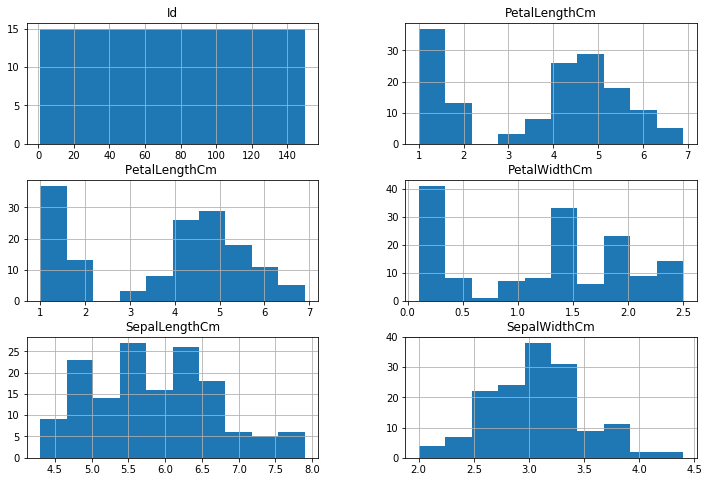

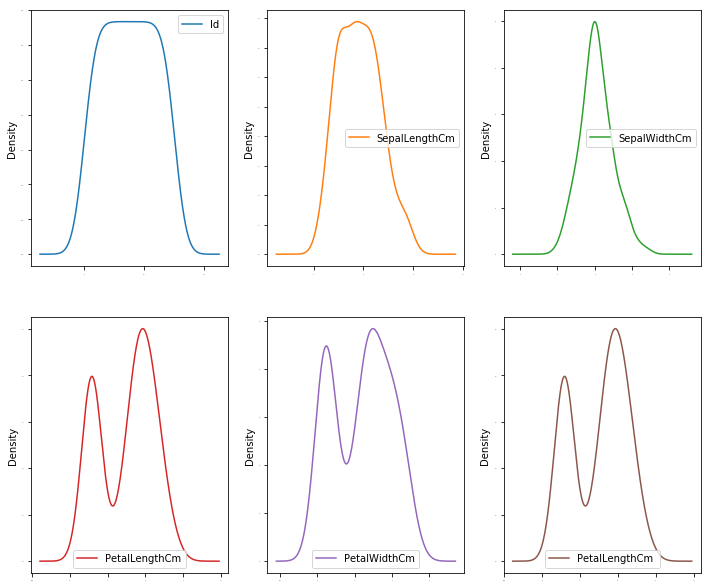

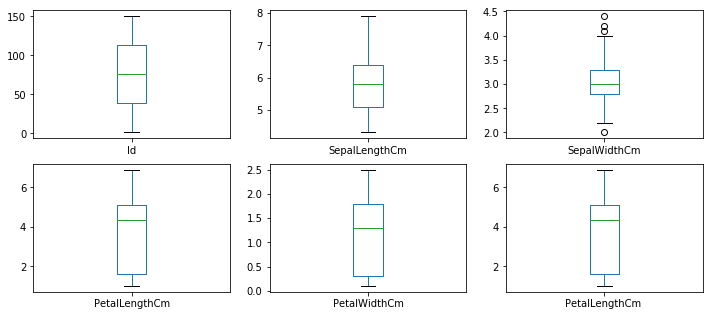

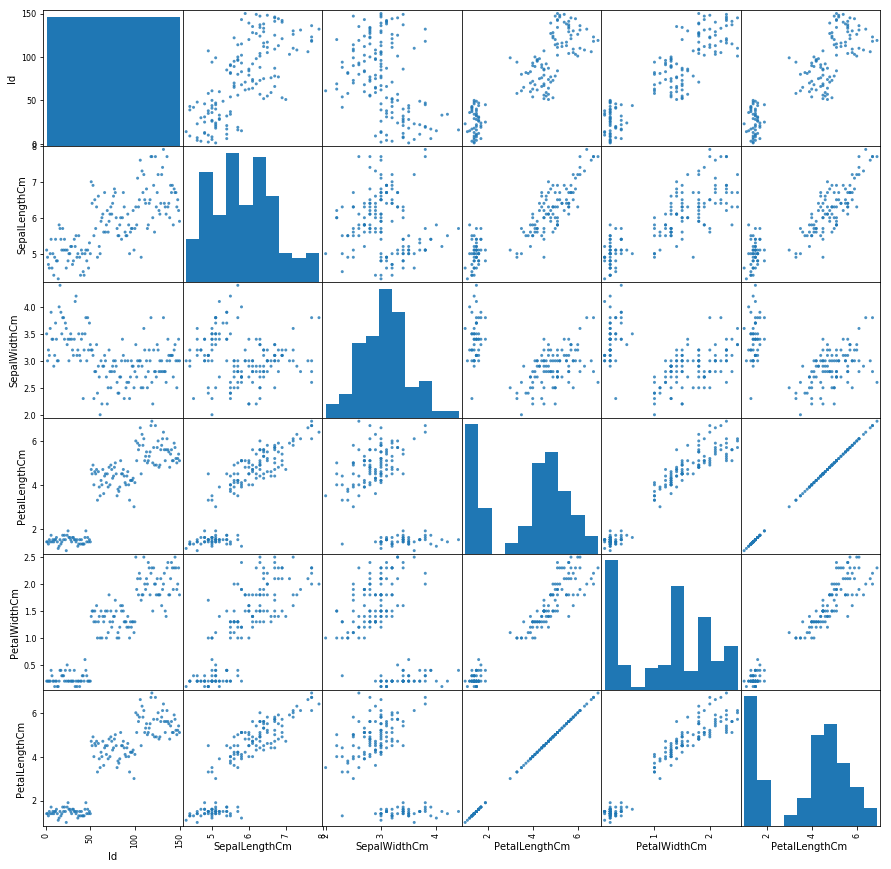

In [47]:
## EDA CHARTS ##

#plot histogram of each numeric variable / attribute in the data set
df.hist(figsize=(12, 8))
pyplot.show()
print('\n')

# generate density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()
print('\n')

# generate box plots of each numeric variable / attribute in the data set
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()
print('\n')

# generate scatter plot matrix of each numeric variable / attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()
print('\n')

In [48]:
## SEPARATE DATASET INTO INPUT AND OUTPUT NUMPY ARRAYS ##
# Must split and set the Training Data Set (X)
# and the Desired Outpout Data Set (Y) these are the dependent variable that we are trying to predict

#store dataframe values into a numpy array
array = df.values

# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 4 (5 - 1)
# these are the independent variables or predictors
X = array[:,1:5]

# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,5]

In [1]:
# IS THIS NOT REQUIRED?????????#

## SPLIT INPUT OUTPUT INTO TRAINING AND TESTING DATASETS ##

# IS THIS NOT REQUIRED?????????#

In [50]:
## BUILD AND TRAIN MODEL ##

# Build the model
# set cluster (K) to 3 to start
model = KMeans(n_clusters=3)

# defaults
KMeans(algorithm='auto', copy_x=True, init= 'k-means++', max_iter=300,
n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto' ,
random_state=None, tol=0.0001, verbose=0)

# Use the model to cluster the input data
model.fit (X)

centroids = model.cluster_centers_
print(centroids)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [51]:
# NEED TO ADD DETAIL DESCR HERE

cluster_labels = model.labels_[::10]
print(cluster_labels)

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [52]:
# NEED TO ADD DETAIL DESCR HERE

cluster_labels = model.labels_
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


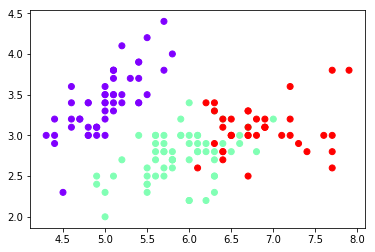

In [53]:
# NEED TO ADD DETAIL DESCR HERE
# this does not show the centroids

pyplot.scatter(X[:,0], X[:,1], c=model.labels_, cmap='rainbow')
pyplot.show()


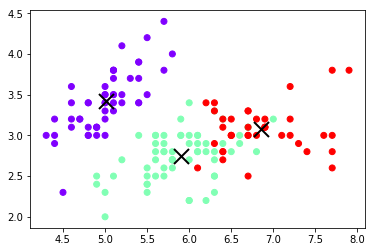

In [54]:
# plot the data points with centroids
# plot using first and second variables of the vector

pyplot.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap= 'rainbow')
lines = pyplot.plot(centroids[0,0],centroids[0,1], 'kx', color= 'black')
pyplot.setp (lines, ms=15.0)
pyplot.setp(lines, mew=2.0)

lines = pyplot.plot(centroids[1,0],centroids[1,1], 'kx', color= 'black')
pyplot.setp (lines, ms=15.0)
pyplot.setp(lines, mew=2.0)

lines = pyplot.plot(centroids[2,0],centroids[2,1], 'kx', color= 'black')
pyplot.setp (lines, ms=15.0)
pyplot.setp(lines, mew=2.0)

pyplot.show ()

In [1]:
## find out how to create cool 3d plot???? ##

import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D

x=30
y=50
z=100

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    
    plt.show()

In [55]:
# now we have trained the model, lets use the trained model to predict a new flower type of a new record

# new record predictors
# sepal length in cm = 5.3
# sepal Width in cm = 3.0
# petal length in cm = 4.5
# petal width in cm 1.5

model.predict([[5.3, 3.0, 4.5, 1.5]])

#new result should be cluster 2 (aka 1)

array([1])